# Segmentez les comportements de clients

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

sns.set()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    


# Exploration and cleaning

In [137]:
df_initial = pd.read_excel('Online Retail.xlsx')

In [138]:
#df = df_initial.copy().sample(50000)
df = df_initial.copy()

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


There is one line per basket line  
There's a lot of rows without CustomerID. Let's see what are these rows

In [140]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


The printing of these rows belows doesn't show anything special that could lead to keep these rows. Let's drop them.

In [141]:
df = df[df['CustomerID'].notnull()]

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


We have now 406829 complete rows. 

In [143]:
df['Country'].nunique()

37

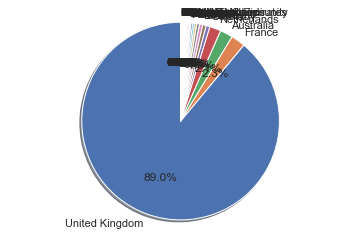

In [144]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df['Country'].unique()
sizes = df['Country'].value_counts()
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [145]:
df.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [146]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

** invoices extend from 2010-12-01 to 2011-12-09, around 1 year **

In [147]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Some quantitative informations

In [148]:
print ("There are {} transactions in the database".format(df.shape[0]))
print ("There are {} customers in the database".format(df['CustomerID'].nunique()))
print ("There are {} products codes in the database".format(df['StockCode'].nunique()))

There are 406829 transactions in the database
There are 4372 customers in the database
There are 3684 products codes in the database


We have huge values Quantity, both positive and negative : is it an erroneous transaction that has been cancelled ?

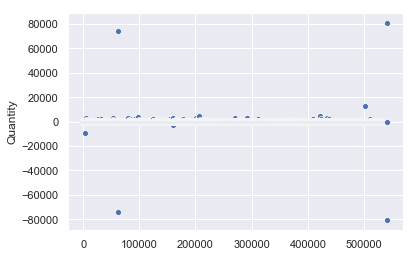

In [149]:
sns.scatterplot(x=df.index,y=df['Quantity'])

In [150]:
df[abs(df['Quantity']) > 6000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


**The 2 transactions with Quantity over 70000 have been cancelled. We can imagine that they were erroneous transactions and will drop them. The 2 other transactions have a strange unit price. we will drop them too.**

In [151]:
df=df[abs(df['Quantity']) < 8000]

In [152]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406823.000000,406823.000000,406823.000000
mean,12.053665,3.460507,15287.702979
std,43.808312,69.315672,1713.595424
min,-3114.000000,0.000000,12347.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,4800.000000,38970.000000,18287.000000


There is a huge Unitprice, Let's see Unitprice more in depth

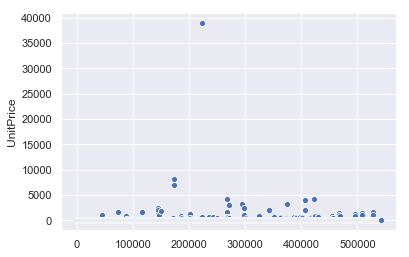

In [153]:
sns.scatterplot(x=df.index, y=df['UnitPrice'])

In [154]:
df[df['UnitPrice']>5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
173391,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom


Let's have a look at StockCodes containg letters

In [155]:
df[df['StockCode'].str.contains("[a-zA-Z]", na=False,regex=True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
51,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom
60,536373,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 09:02:00,3.39,17850.0,United Kingdom
62,536373,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 09:02:00,3.39,17850.0,United Kingdom


StockCodes including a letter seem to have nothing particular. Let's have a look at StockCodes containing only letters

In [156]:
df[df['StockCode'].str.match("[a-zA-Z]",na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.0,EIRE
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.0,United Kingdom
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.00,12738.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.00,12686.0,France


In [157]:
special_codes = df[df['StockCode'].str.match("[a-zA-Z]",na=False)]['StockCode'].unique()
print ("special product codes : {}".format(list(special_codes)))

special product codes : ['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']


**I will drop all transactions with special products codes, ie. StockCodes that contain only letters.**

In [158]:
df=df.drop(df[df['StockCode'].str.match("[a-zA-Z]",na=False)].index)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404903 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      404903 non-null object
StockCode      404903 non-null object
Description    404903 non-null object
Quantity       404903 non-null int64
InvoiceDate    404903 non-null datetime64[ns]
UnitPrice      404903 non-null float64
CustomerID     404903 non-null float64
Country        404903 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.8+ MB


In [160]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,404903.000000,404903.000000,404903.000000
mean,12.098125,2.901157,15295.180883
std,43.657255,4.430872,1710.419044
min,-3114.000000,0.000000,12347.000000
25%,2.000000,1.250000,13969.000000
50%,5.000000,1.950000,15159.000000
75%,12.000000,3.750000,16794.000000
max,4800.000000,649.500000,18287.000000


In [161]:
df[abs(df['Quantity'])> 3000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom


I drop all lines after 30/11/2010

In [162]:
df = df[df['InvoiceDate']<'2011-12-01']

In [163]:
df['Country'] = df['Country'].apply(lambda x : 1 if x=='United Kingdom' else 0)

In [164]:
df = df.sample(frac=1)

In [165]:
df.to_csv('cleaned_df.csv', index=False)